# Testing Trk Low Nrg

## Investigating and resolving the low energy tracker issue.
https://gitlab.com/mev-astronomy/ComPairAPRA/pipeline/compair-pipeline/-/issues/10

## Few notes:
* This has 9 layers so we needed to set it to 9 layers. 

In [2]:
import numpy as np
import math
import h5py

import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [3]:
l3file = h5py.File('/Users/swasti/code/test_temp/testing_trk_low_nrg/TKR_2023-03-08_1024_9Layers_Cs137_L3.h5','r')
l2file = h5py.File('/Users/swasti/code/test_temp/testing_trk_low_nrg/2023-03-08_1024_9Layers_Cs137_L2.h5')

In [4]:
NRG_PER = 60 # percentage to check energy
NLAYERS = 9
#---- Position Constansts ----
TKR_STRIP_PITCH     = 0.051                             # [cm] 510 microns
TKR_WIDTH           = 192 * TKR_STRIP_PITCH             # [cm] 192 strips of constant pitch
TKR_EDGE            = TKR_WIDTH/2.0                     # DSSD is centered at 0, thus the edges are equivalent to half of the width
TKR_STRIP_CENTROID  = TKR_EDGE - (TKR_STRIP_PITCH)/2.0  # Gives the center of strip 191

TRK_LAYER_THICKNESS = 0.05 

TKR_LAYER_SPACING   = 1.9      
# [cm] z spacing between layers
TKR_TOP_LAYER       = (TRK_LAYER_THICKNESS/2.0) + (NLAYERS - 1) * TKR_LAYER_SPACING # [cm] Global z position of layer 0 of the TKR 

XPOS_TBL = np.zeros((192))
YPOS_TBL = np.zeros((192))
ZPOS_TBL = np.zeros((NLAYERS))

for detector_number in range(NLAYERS):
    global ZPOS_TBL
    ZPOS_TBL[detector_number] = float(-detector_number * TKR_LAYER_SPACING + TKR_TOP_LAYER)

for strip_number in range(192):
    XPOS_TBL[strip_number] = float(strip_number * TKR_STRIP_PITCH - TKR_STRIP_CENTROID)
    YPOS_TBL[strip_number] = float(-strip_number * TKR_STRIP_PITCH + TKR_STRIP_CENTROID)


def get_xyz(xloc, yloc, layer):
    xpos = XPOS_TBL[xloc]
    ypos = YPOS_TBL[yloc]
    zpos = ZPOS_TBL[layer]

    return (xpos, ypos, zpos)

In [5]:
def TKR_pinpoint(xpos, ypos, zpos):

    xstrip = round((float(xpos)+TKR_STRIP_CENTROID)/TKR_STRIP_PITCH)
    ystrip = round(-(float(ypos)-TKR_STRIP_CENTROID)/TKR_STRIP_PITCH)
    zlayer = round(abs((float(zpos)-TKR_TOP_LAYER)/TKR_LAYER_SPACING))
    # print('X-strip # ' + str(xstrip) + '; Y-strip # ' + str(ystrip) + '; Z-layer # ' + str(zlayer))
    return xstrip, ystrip, zlayer

# L3 File

* Look at the unique counts and find the strip numbers causing it. 

In [6]:
l3file.keys()

<KeysViewHDF5 ['tracker']>

In [7]:
l3file['tracker'].keys()

<KeysViewHDF5 ['energy', 'event_id', 'event_time', 'pulse_height']>

In [10]:
nrg_arr = l3file['tracker/energy'][...]
nrg = nrg_arr[:,4]

In [11]:
ind = np.where(nrg<50)
low_nrg = nrg[ind]

In [13]:
plt.hist(low_nrg,bins=50)
plt.xlabel('Energy')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

In [36]:
low_x=nrg_arr[:,1][ind]
low_y=nrg_arr[:,2][ind]
low_z=nrg_arr[:,3][ind]

In [56]:
x_uniq, xcounts = np.unique(low_x, return_counts=True)
y_uniq, ycounts = np.unique(low_y, return_counts=True)
z_uniq, zcounts = np.unique(low_z, return_counts=True)
z_uniq

array([ 0.025,  1.925,  3.825,  5.725,  7.625,  9.525, 11.425, 13.325,
       15.225])

In [84]:
t = []
for i in range(x_uniq.shape[0]):
    temp = round((float(x_uniq[i])+TKR_STRIP_CENTROID)/TKR_STRIP_PITCH)
    t.append(temp)

xarr = np.array(t)

t = []
for i in range(y_uniq.shape[0]):
    temp = round(-(float(y_uniq[i])-TKR_STRIP_CENTROID)/TKR_STRIP_PITCH)
    t.append(temp)

yarr = np.array(t)

t = []
for i in range(z_uniq.shape[0]):
    temp = round(abs((float(z_uniq[i])-TKR_TOP_LAYER)/TKR_LAYER_SPACING))
    t.append(temp)

zarr = np.array(t) 

In [61]:
plt.bar(xarr,xcounts,color='green')

<BarContainer object of 145 artists>

In [62]:
plt.bar(yarr,ycounts,color='green')

<BarContainer object of 162 artists>

<BarContainer object of 9 artists>

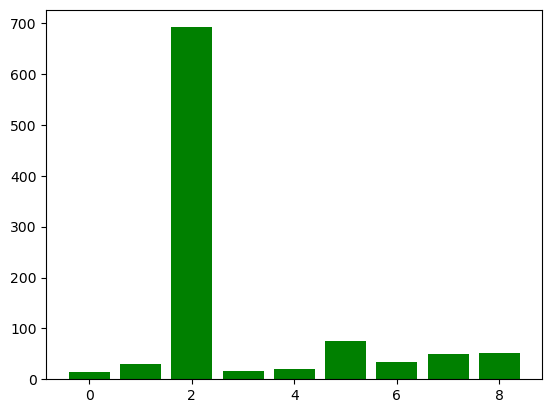

In [64]:
plt.bar(zarr,zcounts,color='green')

In [66]:
for i in range(x_uniq.shape[0]):
    print(xarr[i],xcounts[i])

0 3
1 2
2 2
4 2
5 2
6 1
9 3
10 1
11 3
12 4
13 2
15 2
16 2
17 1
18 2
19 4
21 1
22 1
24 2
25 2
26 1
26 1
27 2
28 5
29 1
30 4
31 2
33 1
34 1
36 4
37 1
38 1
40 1
41 2
44 3
46 1
47 3
49 1
50 1
51 1
53 674
55 2
57 1
59 2
60 1
61 2
62 3
63 3
65 1
66 2
66 1
68 1
69 1
70 1
73 1
74 2
75 2
76 1
77 3
78 3
79 2
80 2
80 1
81 1
82 3
85 1
87 49
88 1
88 1
90 1
90 2
91 1
94 4
95 1
96 2
99 1
100 3
101 7
102 1
103 1
104 4
106 1
107 4
108 1
108 1
110 4
113 2
114 1
115 1
115 1
116 4
118 1
121 1
122 1
123 3
125 1
125 1
126 2
128 2
129 1
130 2
131 1
132 1
133 1
135 1
137 1
140 2
141 1
142 3
143 4
146 1
147 1
149 1
150 1
151 2
154 2
155 2
156 3
157 1
160 1
161 1
161 1
162 1
162 1
163 2
166 2
168 4
169 2
170 2
172 2
172 1
173 2
174 1
176 1
177 1
178 5
179 1
182 1
183 4
185 1
187 1
187 1
188 3
189 2
191 3


In [67]:
for i in range(y_uniq.shape[0]):
    print(yarr[i],ycounts[i])

190 1
189 2
188 9
188 1
187 2
186 1
184 1
183 2
181 2
178 2
176 2
175 2
174 1
173 1
170 1
170 1
170 1
167 1
164 2
164 1
163 2
162 1
161 1
159 1
155 3
153 2
152 2
150 1
149 1
147 2
145 3
142 1
140 47
139 2
136 2
135 2
134 1
134 1
133 1
132 1
131 1
129 2
128 1
125 1
124 1
123 1
122 2
121 1
119 1
118 1
117 1
116 3
115 2
113 1
112 1
111 1
110 4
108 1
105 2
104 2
103 3
102 1
100 1
99 1
98 2
98 1
96 1
96 1
94 2
93 1
92 1
92 6
91 1
89 2
87 3
87 1
85 1
84 3
84 2
83 2
82 1
82 2
81 3
79 3
76 1
74 2
72 1
70 1
70 1
68 1
67 2
66 1
66 1
64 1
64 2
63 1
62 1
61 2
60 3
59 1
57 2
56 1
56 1
55 2
54 3
53 1
50 1
48 4
47 2
46 1
46 1
45 1
44 2
44 1
43 2
42 1
41 1
40 1
39 1
37 2
36 1
35 1
33 11
32 1
31 1
30 3
29 1
28 1
24 2
24 1
23 1
21 1
21 1
20 1
19 1
19 1
18 1
18 1
17 1
16 1
15 1
14 1
14 1
14 1
13 2
12 2
12 1
11 1
10 2
9 1
8 1
8 1
7 1
6 1
6 1
5 9
4 1
4 1
3 1
2 3
1 4
0 675


## L3 Summary:

# Now L2 and energy calibration  

> Verify the flag for the detector strip.       

> Also verify the cflag

In [74]:
l2file['Calibration/cflag']

<HDF5 dataset "cflag": shape (10, 2, 192), type "<f8">

In [75]:
layer = 2
x = 53
y = 0
print(l2file['Calibration/cflag'][layer, 0, x])
print(l2file['Calibration/cflag'][layer, 1, y])

1.0
2.0


In [78]:
l2file.attrs.keys()

<KeysViewHDF5 ['compair_daq_git_branch', 'compair_daq_git_hash', 'ecalib_file', 'l1tol2_ecal_func_version', 'recording_start_time', 'recording_stop_time']>

In [79]:
l2file.attrs['ecalib_file']

'EnergyCalibrationCoefficients_Master_20221206.dat'

### Notes: 
* Doesnt show issue with the current energy calibration file.    
* But the ecalib file is an older one. 

# Summary :
* It was caused by using older calibariton file. The new calibration file has the anode flagged. 
* We can fix this by using the newest calibration file. 